## Predicting heart disease using machine learning

this notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heartdisease based on their medical attributes

 we are going to take the following approach:

1.problem defination

2.data

3.evaluation

4.features

5.modelling

6.experimentation

### 1.problem definition

>given clinical parameters about a patient,can we predict whether or not they have heart disease?

### 2.data

'''Only 14 attributes used:
      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        
      4. #10 (trestbps)  
      5. #12 (chol)      
      6. #16 (fbs)       
      7. #19 (restecg)   
      8. #32 (thalach)   
      9. #38 (exang)     
      10. #40 (oldpeak)   
      11. #41 (slope)     
      12. #44 (ca)        
      13. #51 (thal)      
      14. #58 (num)       (the predicted attribute)
'''

original data is from cleavland data from UCI machine learning repository

### 3.evaluate

>if we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept,we'll pursue the project

### 4.features 
this is where you will get different information about each of the features in your data

#### preparing tools

were are going to use pandas ,matplotlib,numpy for data analysisi and manipulation

In [4]:
#regular EDA(exploratorydataanalysis) and plotting libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay


#### load data`

In [6]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

#### data exploration (exploratiry data analysis or EDA)


what questions ar e we tryin to solve,what kind of data do we haev and how do we treat differenet types ,whats missing from data and how to deal with it,what are the outliers and why shuold you care about them,how can you add ,remove fetatures to get more out of your data?

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

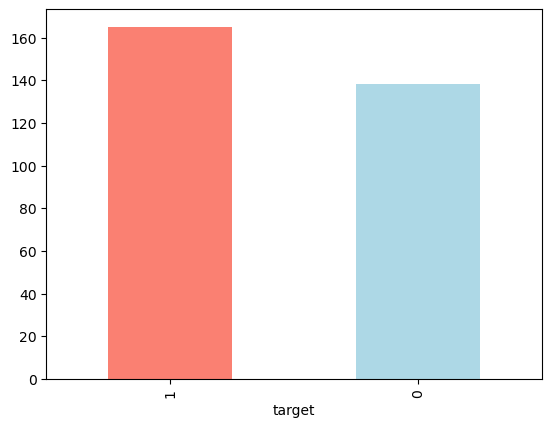

In [9]:
df["target"].value_counts().plot(kind = "bar",color = ["salmon","lightblue"]);

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
#missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### heart disease frequency according to sex

In [13]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [14]:
#compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


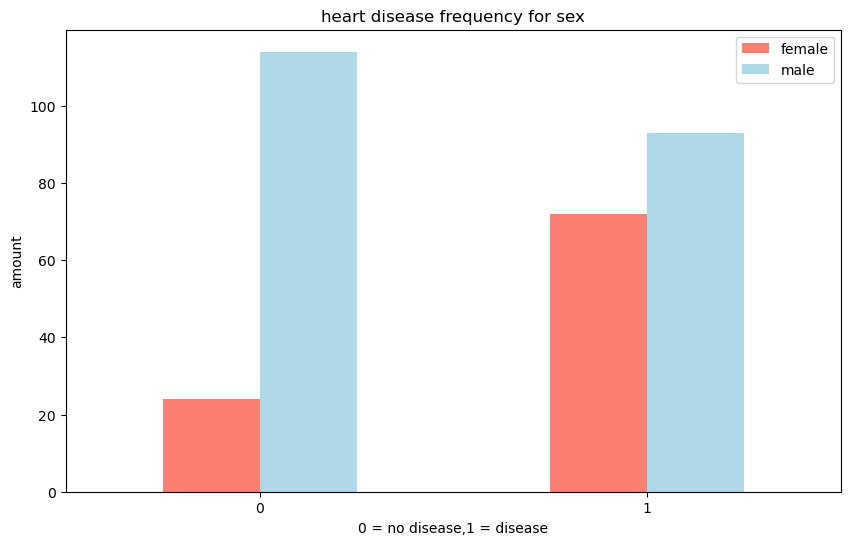

In [22]:
#create a grapfh of crosstab
pd.crosstab(df.target,df.sex).plot(kind = "bar",
                                  figsize = (10,6),
                                  color = ["salmon","lightblue"])
plt.title("heart disease frequency for sex")
plt.xlabel("0 = no disease,1 = disease")
plt.ylabel("amount")
plt.legend(["female","male"])
plt.xticks(rotation = 0);

#### age vs max heart rate for heart disease

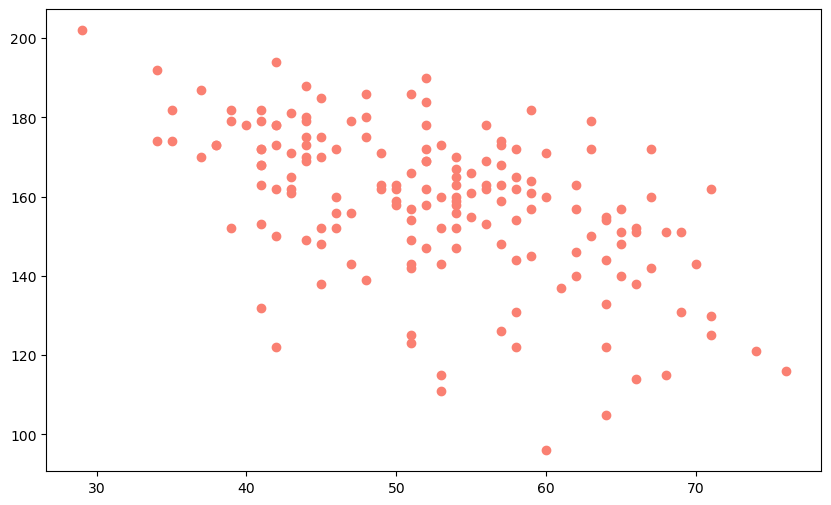

In [23]:
#create another figure
plt.figure(figsize = (10,6))

#scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color = "salmon")


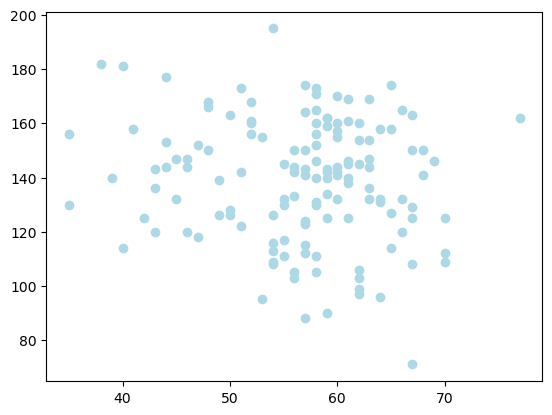

In [24]:
#scatter with negtive xeamples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color = "lightblue");

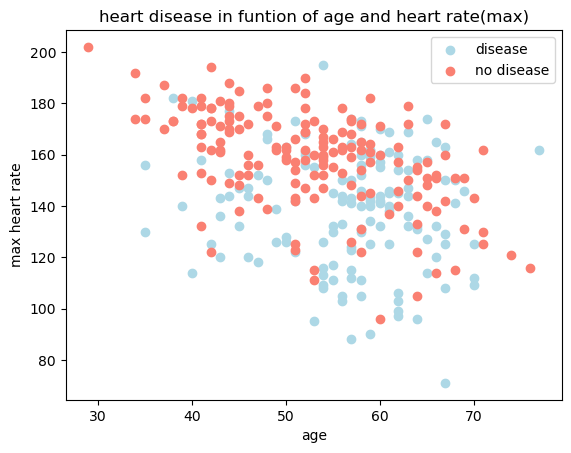

In [27]:
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color = "lightblue");
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color = "salmon");
plt.title("heart disease in funtion of age and heart rate(max)")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["disease","no disease"]);

<Axes: ylabel='Frequency'>

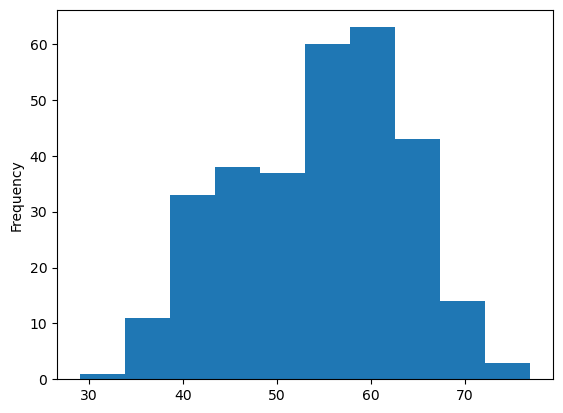

In [28]:
#check teh distribustion of age column with a histogram
df.age.plot.hist()

<Axes: ylabel='Frequency'>

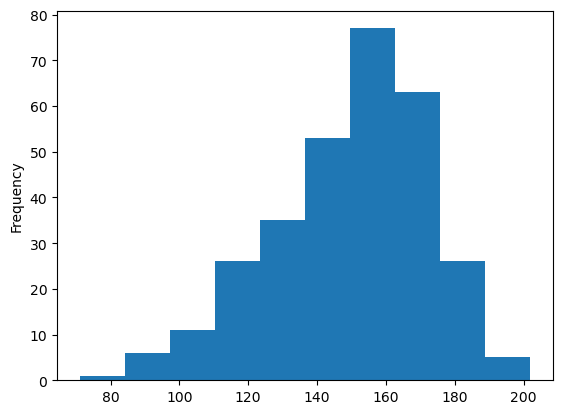

In [29]:
df.thalach.plot.hist()

#### heart disease frequency per chest pain type

In [30]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


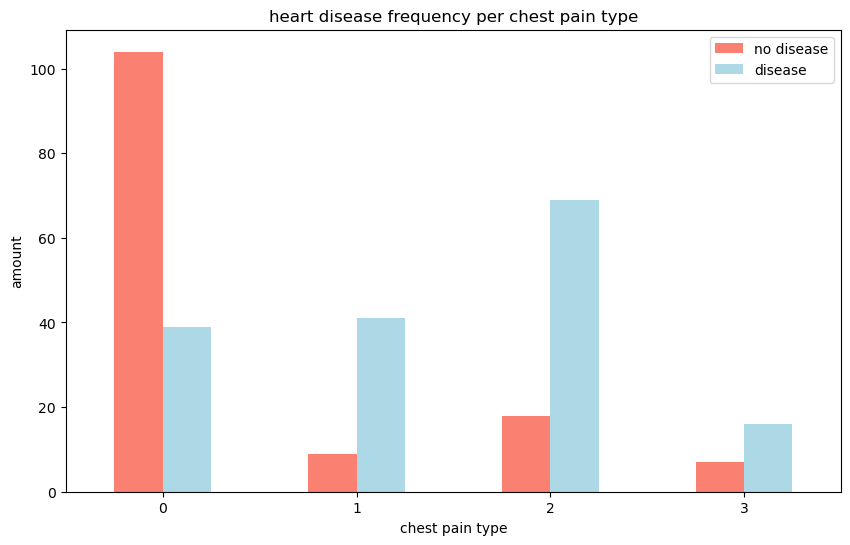

In [32]:
 #make crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind = "bar",
                                 figsize=(10,6),
                                 color = ["salmon","lightblue"]);
plt.title("heart disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["no disease","disease"])
plt.xticks(rotation = 0);

In [33]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


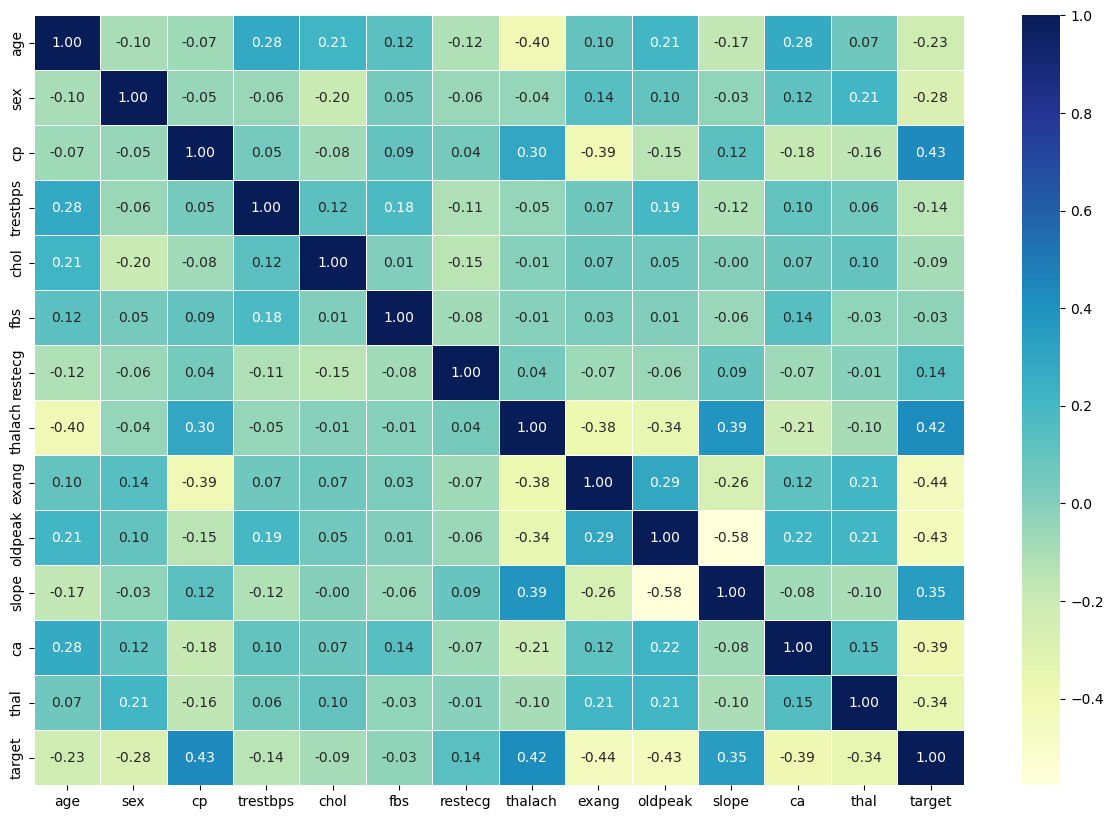

In [34]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu");
bottom,top = ax.get_ylim()

### 5.modelling

In [35]:
X = df.drop("target",axis =1)
y = df["target"]

In [36]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [37]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [38]:
#split data
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

data is ready,its time to build machine learning models

we are trying with three diffferent models

In [40]:
#put models in a dictionary
models = {"logistic regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "random forest":RandomForestClassifier()}
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
        
    return model_scores 

In [42]:
model_scores = fit_and_score(models = models,
                            X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
model_scores

{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'random forest': 0.8360655737704918}

#### model comparision

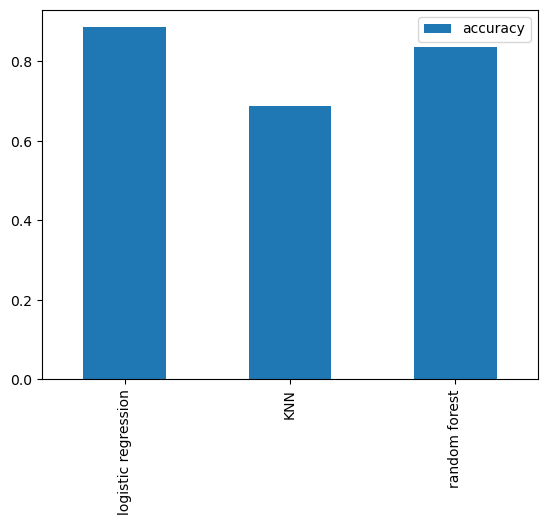

In [48]:
model_compare = pd.DataFrame(model_scores,index =["accuracy"])
model_compare.T.plot.bar();

we have got a baseline model..

looking at the following

hyperparameter tuning
feature importance confusion matrix
cross validation
precision
recall
f1 score
classifiaction report
roc curve
area under the curve

### hyperparameter tuning

In [49]:
#tuning KNN

train_scores = []
test_scores = []

#create a list of different values of n_neighbors
neighbors = range(1,21)

#set up KNN instance
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(X_train,y_train)
    
    #update the traing scores
    train_scores.append(knn.score(X_train,y_train))
    
    #update the testing scores
    test_scores.append(knn.score(X_test,y_test))
    

In [50]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [51]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum KNN score on test data : 75.41%


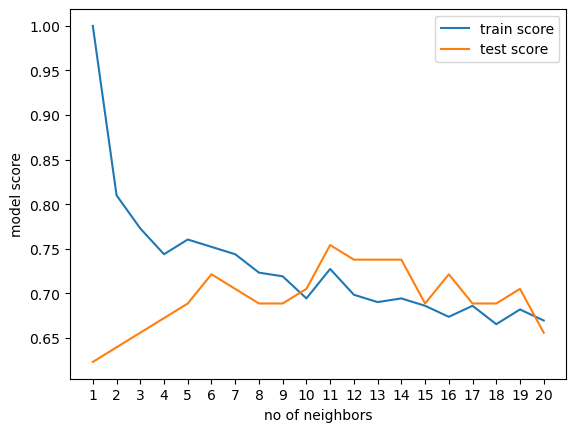

In [54]:
plt.plot(neighbors,train_scores,label = "train score")
plt.plot(neighbors,test_scores,label = "test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("no of neighbors")
plt.ylabel("model score")
plt.legend()

print(f"maximum KNN score on test data : {max(test_scores)*100:.2f}%")

#### tuning with randomizedserachcv

In [61]:
#create a hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4,4,20),
                 "solver" : ["liblinear"]}

#crete a hyperparametr grid for randomforest c;lassifier
rf_grid = {
    "n_estimators": np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

#tune log-reg

In [57]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv =5,
                               n_iter = 20,
                               verbose = True)

#fit random hyperparametr tuning 
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [58]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [59]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [62]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)
rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [63]:
#finding best params
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [64]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [65]:
#now using grid search cv

since our logisticregression model prvie=des the best scores so far,
well try to improve them using gridsearchcv

In [67]:
log_reg_grid = {"C": np.logspace(-4,4,30),
                 "solver" : ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [68]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [69]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

### evaluation 

to make comparisions and evaluate our trained model,first we need to make the predictions

In [70]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

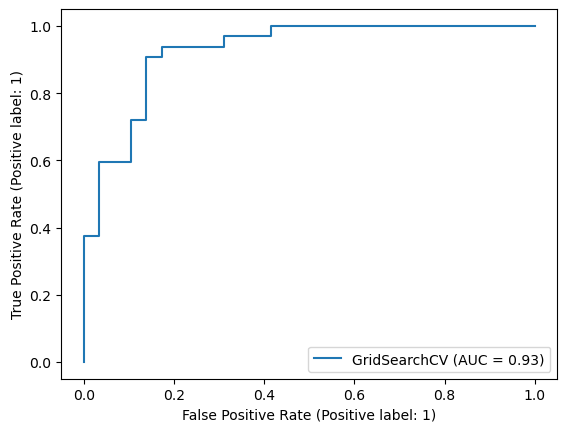

In [83]:
#plot ROC curve
display = RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)


In [84]:
#confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [90]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    plot a nice looking confusion matrix
    """
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("predicted label")
    plt.ylabel("true label")

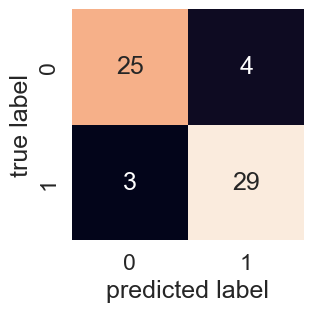

In [91]:
plot_conf_mat(y_test,y_preds)

In [92]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



precision,recall,f1_score using cross validation

In [93]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [94]:
#create a new classsifer using best parameters

In [97]:
clf = LogisticRegression(C = 0.20433597178569418,solver = "liblinear")

In [98]:
#cross validated accuracy,precision,recall,f1_score

In [100]:
cv_ac = cross_val_score(clf,X,y,cv =5,scoring = "accuracy")
cv_ac

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [107]:
accuracy = np.mean(cv_ac)

In [108]:
cv_precision = cross_val_score(clf,X,y,cv = 5 ,scoring = "precision")
precision = cv_precision.mean()

In [109]:
cv_recall = cross_val_score(clf,X,y,cv =5,scoring = "recall")
recall = cv_recall.mean()

In [110]:
cv_f1_score = cross_val_score(clf,X,y,cv =5,scoring = "f1")
f1 = cv_f1_score.mean()

<Axes: title={'center': 'cross_validatd_classification_report'}>

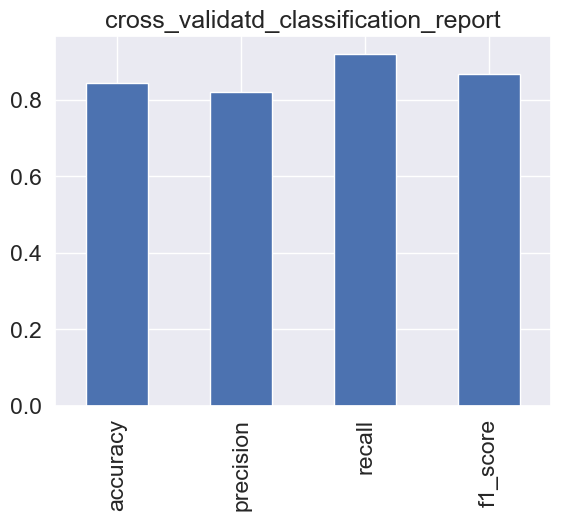

In [113]:
cv_metrics = pd.DataFrame({
    "accuracy":accuracy,
    "precision":precision,
    "recall":recall,
    "f1_score":f1
},
    index = [0]
)

cv_metrics.T.plot.bar(title = "cross_validatd_classification_report",legend = False)


### feature importance

feature importance is another as asking "which features contributed most to the outcomes of the model and how did they contrbuted?"

In [123]:
#check coef_
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")

In [124]:
clf.fit(X_train,y_train)
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [125]:
#match coef's fo teatures to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

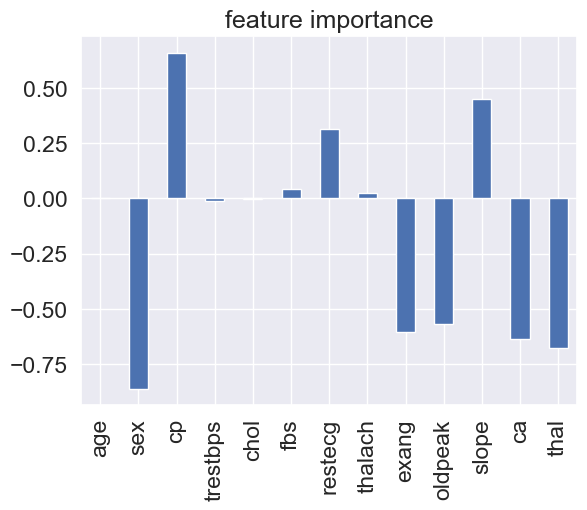

In [126]:
#visualize feature importance
feature_df = pd.DataFrame(feature_dict,index =[0])
feature_df.T.plot.bar(title= "feature importance",legend = False);

In [127]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### 6.Experimentation

#### if we havent hit our evaluation metric yet..

could we collect more data?

could we try a better model? like cat boost ,XG booost

coyld we improve the present model?

if our model is good enough , export it..